# 2.Clasification

Import important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
#model selection
from sklearn.model_selection import train_test_split

#classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

#Experiment with deeplearning eh multi layer JST
import tensorflow as tf
from tensorflow import keras

sns.set()
%matplotlib inline
classifier = 'random_forest'
postfix = '_no_outliers_heatmap'

### Import datasets

In [2]:
df = pd.read_csv('data/main_dataset_no_outliers.csv')
y = df['best_pos']
X = df.drop(['best_pos'], axis=1)
d = joblib.load('data/label_encoder_model.sav')
print(X.shape, y.shape)

(17712, 57) (17712,)


(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5, 36.5, 38.5, 40.5, 42.5,
        44.5, 46.5, 48.5, 50.5, 52.5, 54.5, 56.5]),
 <a list of 29 Text yticklabel objects>)

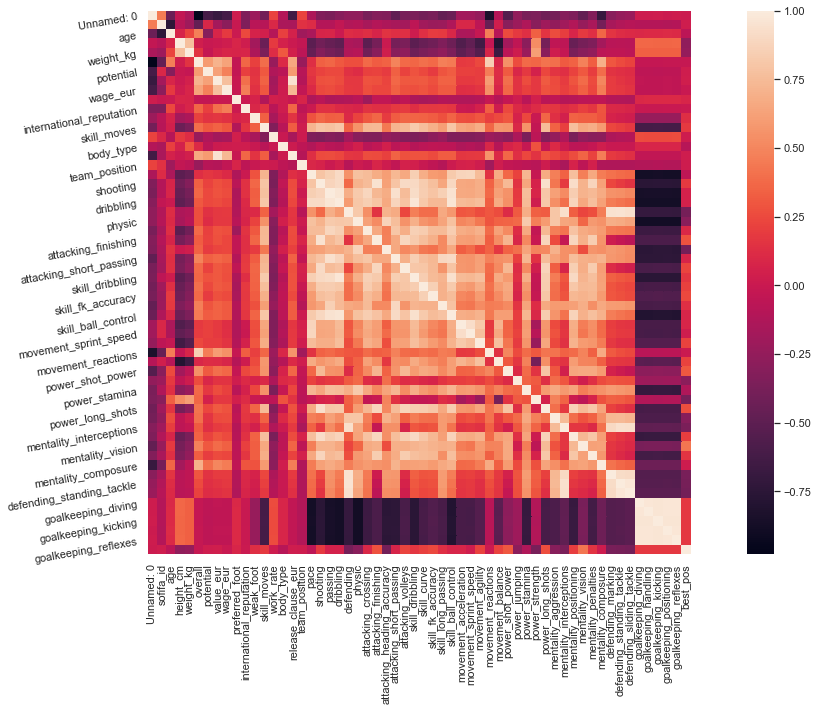

In [3]:
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
plt.figure(figsize=(20, 10))
ax = sns.heatmap(corr, vmax=1, square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=10)

Nice, let's build a dataframe using "Heatmap correlation" feature

In [4]:
corr['best_pos']

Unnamed: 0                    0.010317
sofifa_id                     0.031124
age                          -0.061317
height_cm                    -0.264465
weight_kg                    -0.240427
overall                      -0.014479
potential                     0.030220
value_eur                     0.036638
wage_eur                     -0.001718
preferred_foot                0.087294
international_reputation      0.003724
weak_foot                     0.129446
skill_moves                   0.186207
work_rate                     0.023007
body_type                    -0.086656
release_clause_eur            0.030321
team_position                 0.023533
pace                         -0.056638
shooting                      0.180454
passing                       0.059607
dribbling                     0.056641
defending                    -0.385589
physic                       -0.298368
attacking_crossing            0.100127
attacking_finishing           0.286222
attacking_heading_accurac

In [5]:
corr['best_pos'].loc[corr['best_pos']>0].keys() #select feature with corelation more than 0.1 with best_pos

Index(['Unnamed: 0', 'sofifa_id', 'potential', 'value_eur', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'release_clause_eur', 'team_position', 'shooting', 'passing',
       'dribbling', 'attacking_crossing', 'attacking_finishing',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_long_shots', 'mentality_positioning',
       'mentality_vision', 'mentality_penalties', 'mentality_composure',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'best_pos'],
      dtype='object')

In [6]:
feature = ['weak_foot', 'skill_moves', 'shooting', 'attacking_crossing',
       'attacking_finishing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'movement_agility', 'movement_balance', 'power_shot_power',
       'power_long_shots', 'mentality_positioning', 'mentality_vision',
       'mentality_penalties', 'goalkeeping_diving', 'goalkeeping_handling',
       'goalkeeping_kicking', 'goalkeeping_positioning',
       'goalkeeping_reflexes',
        'potential', 'overall', 'pace', 'passing', 'dribbling', 'defending', 'physic'] #combine with my previous feature
X = X[feature]
X.head()

,weak_foot,skill_moves,shooting,attacking_crossing,attacking_finishing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,potential,overall,pace,passing,dribbling,defending,physic
0,2,1,0.0,15,15,13,14,20,13,37,...,79,82,83,85,83,0.0,0.0,0.0,0.0,0.0
1,4,1,0.0,13,13,12,10,14,12,12,...,79,83,85,84,83,0.0,0.0,0.0,0.0,0.0
2,4,4,89.0,66,89,88,79,78,78,73,...,5,4,4,83,83,69.0,75.0,80.0,30.0,65.0
3,3,1,0.0,18,12,15,12,13,15,46,...,79,79,88,83,83,0.0,0.0,0.0,0.0,0.0
4,3,3,71.0,68,72,58,78,76,68,82,...,11,14,12,83,83,54.0,80.0,79.0,80.0,71.0


## Clasify

In [7]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10101)

In [8]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
result = clf.predict(X_test)

In [10]:
classes = d['best_pos'].classes_
print(*zip(range(8),classes),sep='\n')

(0, 'Back_Centre')
(1, 'Back_Side')
(2, 'Back_Winger')
(3, 'Fwd_Centre')
(4, 'Fwd_Winger')
(5, 'Goal_Keeper')
(6, 'Mid_Centre')
(7, 'Mid_Side')


In [11]:
d['best_pos'].inverse_transform([6])

array(['Mid_Centre'], dtype=object)

In [12]:
result = pd.DataFrame(result)
result_inverse = d['best_pos'].inverse_transform(np.ravel(result))

In [13]:
clf.score(X_test,y_test)*100

83.19783197831978

In [14]:
print(classification_report(y_test, result, zero_division=True))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       754
           1       0.82      0.89      0.85       640
           2       1.00      0.00      0.00        36
           3       0.87      0.92      0.90       633
           4       0.35      0.04      0.07       178
           5       1.00      1.00      1.00       486
           6       0.82      0.87      0.84      1165
           7       0.62      0.67      0.65       536

    accuracy                           0.83      4428
   macro avg       0.80      0.66      0.65      4428
weighted avg       0.82      0.83      0.82      4428



In [15]:
report = classification_report(y_test, result, zero_division=True, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report.to_csv('output/'+ classifier + postfix +'.csv')

In [16]:
df_report

,precision,recall,f1-score,support
0,0.898374,0.879310,0.888740,754.000000
1,0.816881,0.892188,0.852875,640.000000
2,1.000000,0.000000,0.000000,36.000000
3,0.873874,0.919431,0.896074,633.000000
4,0.350000,0.039326,0.070707,178.000000
5,1.000000,1.000000,1.000000,486.000000
6,0.817889,0.871245,0.843724,1165.000000
7,0.622837,0.671642,0.646320,536.000000
accuracy,0.831978,0.831978,0.831978,0.831978
macro avg,0.797482,0.659143,0.649805,4428.000000


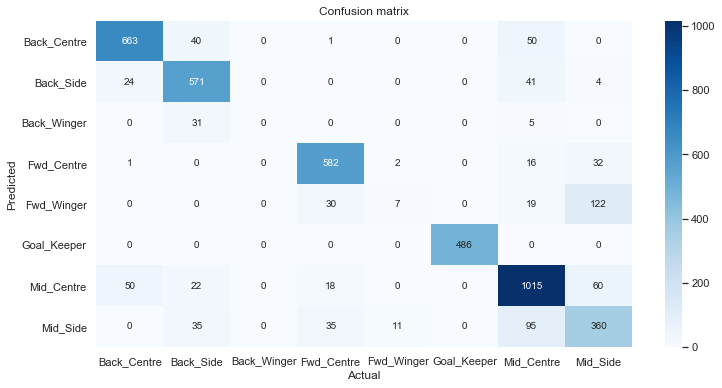

In [17]:
conf_matrix = confusion_matrix(y_test, result)
plt.figure(figsize=(12,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=classes, 
            yticklabels=classes,
            cmap="Blues",
            fmt='d')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [18]:
#save model
joblib.dump(clf,'model/'+ classifier + postfix +'.sav')

['model/random_forest_no_outliers_heatmap.sav']

## Cross validation score using K-fold

![Kfold](grid_search_cross_validation.png)

In [19]:
from sklearn.model_selection import cross_validate

In [20]:
cv_result = cross_validate(clf, X_train, y_train, cv=5, scoring=['f1_micro', 'f1_macro', 'f1_weighted', 'accuracy'],return_estimator = True)

In [21]:
cv_result

{'fit_time': array([1.79619527, 1.79519987, 1.73037577, 1.74134374, 1.73336911]),
 'score_time': array([0.05186057, 0.05680656, 0.05684781, 0.05393076, 0.05481935]),
 'estimator': (RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_jobs=None, oob_score=False, random_state=None,
                         verbose=0, warm_start=False),
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_

In [22]:
joblib.dump(cv_result,'model/'+ classifier + postfix +'_cv.sav')

['model/random_forest_no_outliers_heatmap_cv.sav']

In [23]:
np.mean(cv_result['test_f1_weighted'])*100

81.09777643335975